In [1]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
import tensorflow as tf

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.set_visible_devices(physical_devices[0], 'GPU')

IndexError: list index out of range

In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
for i, device in enumerate(physical_devices):
    print(i, device.name)

In [2]:
train_path="E:/SBIR/Selected/train"
test_path="E:/SBIR/Selected/test"
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)

In [3]:
print(class_names)
print(class_names_test)

['airplane', 'apple', 'banana', 'bicycle', 'car', 'dog', 'door', 'ladder', 'moon', 'sheep', 'table', 'tree', 'wheel']
['airplane', 'apple', 'banana', 'bicycle', 'car', 'dog', 'door', 'ladder', 'moon', 'sheep', 'table', 'tree', 'wheel']


In [4]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()

In [5]:
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')

Found 780 images belonging to 13 classes.
Found 260 images belonging to 13 classes.


In [6]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="E:/SBIR/Selected/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="E:/SBIR/Selected/test", target_size=(224,224))

Found 780 images belonging to 13 classes.
Found 260 images belonging to 13 classes.


In [7]:
def VGG16():
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
    model.add(Flatten(name='flatten'))
    model.add(Dense(256, activation='relu', name='fc1'))
    model.add(Dense(128, activation='relu', name='fc2'))
    model.add(Dense(13, activation='sigmoid', name='output'))
    return model

In [8]:
model=VGG16()

In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [10]:
from keras.models import Model
Vgg16 = Model(inputs=model.input, outputs=model.get_layer('vgg16').output)

In [11]:
Vgg16.load_weights("E:/SBIR/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")

In [12]:
for layer in Vgg16.layers:
    layer.trainable = False

In [13]:
for layer in model.layers:
    print(layer, layer.trainable)

<keras.layers.convolutional.conv2d.Conv2D object at 0x000001DFC6810FA0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001DFC6927220> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001DFC69279D0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001DFC6976610> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001DFC69765E0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001DFC6927310> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001DFC38E1550> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001DFC699E8B0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001DFBA097EB0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001DFC69767F0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001DFC69A9310> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001DFC69A9B50> False
<keras.layers.convolutional.conv2d.Conv2D o

In [15]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

e:\Ana\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
H = model.fit_generator(train_generator,validation_data=test_generator,epochs=100,verbose=1,callbacks=[es])

C:\Users\Yahya Akel\AppData\Local\Temp\ipykernel_8808\3922148878.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(train_generator,validation_data=test_generator,epochs=100,verbose=1,callbacks=[es])


Epoch 1/100
25/25 [==============================] - 81s 3s/step - loss: 0.7615 - accuracy: 0.8910 - val_loss: 1.4022 - val_accuracy: 0.8231
Epoch 2/100
25/25 [==============================] - 80s 3s/step - loss: 0.5942 - accuracy: 0.8962 - val_loss: 1.2429 - val_accuracy: 0.8462
Epoch 3/100
25/25 [==============================] - 82s 3s/step - loss: 0.4236 - accuracy: 0.9269 - val_loss: 0.8110 - val_accuracy: 0.8654
Epoch 4/100
25/25 [==============================] - 89s 4s/step - loss: 0.3304 - accuracy: 0.9333 - val_loss: 0.8487 - val_accuracy: 0.8692
Epoch 5/100
25/25 [==============================] - 92s 4s/step - loss: 0.4198 - accuracy: 0.9244 - val_loss: 1.2307 - val_accuracy: 0.8769
Epoch 6/100
25/25 [==============================] - 89s 4s/step - loss: 0.3342 - accuracy: 0.9308 - val_loss: 0.7109 - val_accuracy: 0.8962
Epoch 7/100
25/25 [==============================] - 87s 4s/step - loss: 0.3078 - accuracy: 0.9410 - val_loss: 1.2641 - val_accuracy: 0.8577
Epoch 8/100
2

In [18]:
# Renders the charts for training accuracy and loss.
import matplotlib.pyplot as plt
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

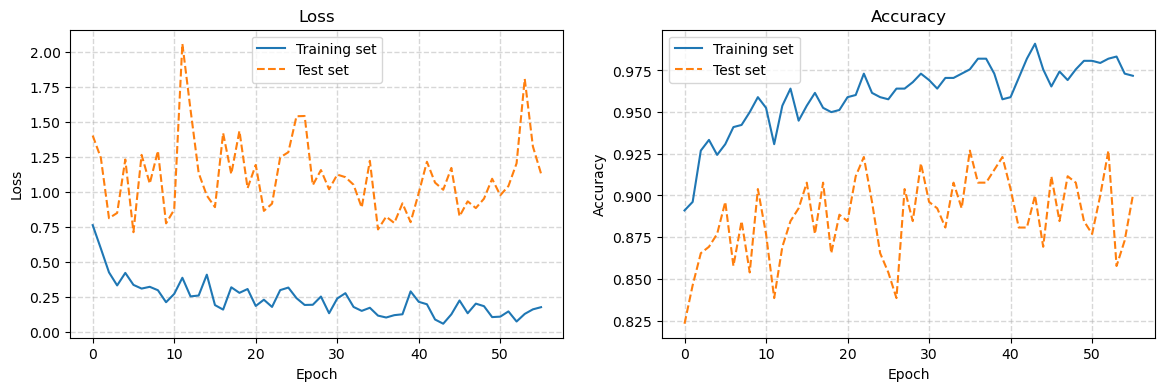

In [19]:
render_training_history(H)

In [26]:
predictions = model.predict(test_generator)

9/9 [==============================] - 21s 2s/step


In [28]:
Y_pred = model.predict(test_generator, 260 // 33)
y_pred = np.argmax(Y_pred, axis=1)

9/9 [==============================] - 20s 2s/step


In [30]:
print(y_pred)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  0  1  1  2  0  0  0  2
  0  0  1  2  2  2  2  1  2  0  2  2  3  3  0  3  0  1  0  3  1  0  3  3
  3  0  0  0  0  3  3  0  0  4  4  0  4  4  4  0  4  0  0  4  4  4  4  0
  4  4  0  0  5  5  0  5  5  5  3  5  5  5  0  5  0  0  0  3  0  4  0  0
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7
  7  0  7  0  0  2  7  0  1  7  0  7  0  7  0  7  1  1  2  1  1  1  1  1
  2  1  1  1  1  1  1  1  0  1  1  1  3  3  5  5  5  3  0  5  0  3  5  5
  3  0  3  3  3  5  0  5  2  2  0  6 10  0 10  0 10 10 10 10  0  0 10  5
 10 10 10  0  0 11  5  0  0  5  0  5  0  0  0  0  5  5  0  0  0  0  0  2
  1  1  1  2  2  2  1  2  2  2  1  2  8  1  2  2  2  2  2  2]


In [31]:
print(test_generator)

In [29]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(test_generator, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [9, 260]

In [20]:
import pickle
with open('model_cnnVGGCOMPLETE.pkl', 'wb') as file:
      pickle.dump(model, file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_10
......vars
.........0
.........1
...layers\conv2d_11
......vars
.........0
.........1
...layers\conv2d_12
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\conv2d_4
......vars
.........0
.........1
...layers\conv2d_5
......vars
.........0
.........1
...layers\conv2d_6
......vars
.........0
.........1
...layers\conv2d_7
......vars
.........0
.........1
...layers\conv2d_8
......vars
.........0
.........1
...layers\conv2d_9
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...la